In [1]:
import numpy as np
import pandas as pd
import os

from os.path import join

from time import time


In [2]:
import numpy as np

from scipy.stats import chi2_contingency

table = np.array([[1, 40], [303, 3682]])

res = chi2_contingency(table)

res.statistic
res.pvalue


0.3430509851785464

In [3]:
!pip install FlowCal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.2 MB/s eta 0:00:00
  Created wheel for FlowCal: filename=FlowCal-1.3.0-py3-none-any.whl size=84527 sha256=b796552b9cd868bec38fa61b2e0c2735b11871599827948a570bb280428adab3
  Stored in directory: /root/.cache/pip/wheels/b1/9c/f3/4c59694424e6a6d70b11b66f076d8a2359b57dfdb9b723ed3f
Successfully built FlowCal
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [5]:
import FlowCal

s = FlowCal.io.FCSData('02-blank-A2-1.fcs')
print(s.shape)


(137295, 26)


In [6]:
print(s.channels)

('FSC-H', 'FSC-A', 'SSC-H', 'SSC-A', 'FL1-H', 'FL1-A', 'FL2-H', 'FL2-A', 'FL3-H', 'FL3-A', 'FL4-H', 'FL4-A', 'FL5-H', 'FL5-A', 'FL6-H', 'FL6-A', 'FL7-H', 'FL7-A', 'FL8-H', 'FL8-A', 'FL9-H', 'FL9-A', 'FL10-H', 'FL10-A', 'FSC-Width', 'Time')


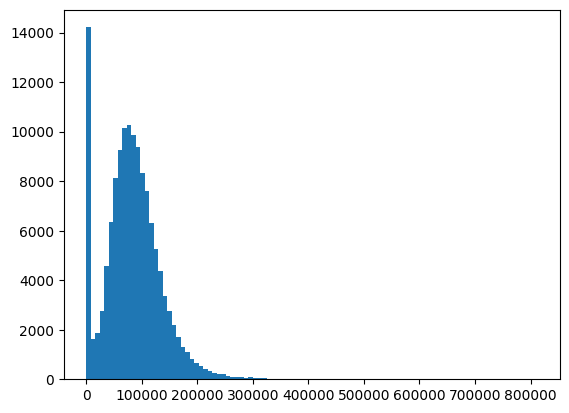

In [7]:
import matplotlib.pyplot as plt
plt.hist(s[:, 'FL1-H'], bins=100)
plt.show()

In [8]:
s_transformed = FlowCal.transform.to_rfi(s, channels='FL1-H')
s_transformed

FCSData([[ 1.02684004e+04,  6.78689990e+03,  7.67529980e+03, ...,
           1.32800003e+02,  6.77063110e+02,  3.77280000e+04],
         [ 1.15397002e+04,  2.94000000e+02,  1.88019995e+03, ...,
           2.61700012e+02,  2.60970879e+01,  3.82800000e+04],
         [ 1.60964004e+04,  1.15012002e+04,  1.27457998e+04, ...,
           4.28000000e+02,  7.31642151e+02,  3.91310000e+04],
         ...,
         [ 1.20665000e+04,  1.17687998e+04,  1.26142002e+04, ...,
           6.64000015e+01,  9.98917786e+02,  2.99991700e+06],
         [ 1.23995000e+04,  1.28400000e+04,  1.85876992e+04, ...,
          -5.94000015e+01,  1.06097864e+03,  2.99991900e+06],
         [ 1.10722998e+04,  1.17724004e+04,  6.51250000e+03, ...,
          -1.30800003e+02,  1.08873987e+03,  2.99994500e+06]])

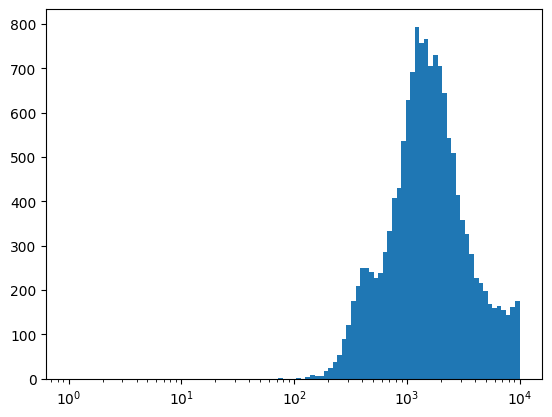

In [9]:
import numpy as np
bins = np.logspace(0, 4, 100)
plt.hist(s_transformed[:, 'FL1-H'], bins=bins)
plt.xscale('log')
plt.show()


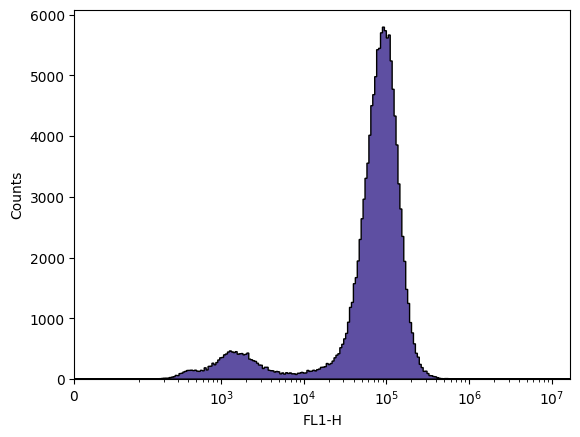

In [10]:
s = FlowCal.io.FCSData('02-blank-A2-1.fcs')
s = FlowCal.transform.to_rfi(s)

FlowCal.plot.hist1d(s, channel='FL1-H')
plt.show()


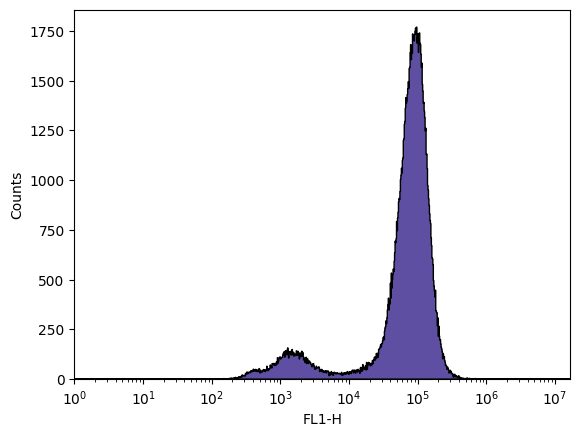

In [11]:
FlowCal.plot.hist1d(s, channel='FL1-H', xscale='log', bins=1024)
plt.show()


In [29]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A2-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))


558.9000244140625
[558.9000244140625, 407.29998779296875, 431.8999938964844, 337.3999938964844, 179.1999969482422, 328.1000061035156, 593.4000244140625, 95737.3984375, 491.29998779296875, 1255.9000244140625, 401.6000061035156, 570.2000122070312, 562.7000122070312, 403.1000061035156, 335.8999938964844, 628.0999755859375, 334.29998779296875, 806.4000244140625, 569.2000122070312, 383.29998779296875, 548.9000244140625, 293.1000061035156, 551.2999877929688, 348.1000061035156, 300.3999938964844, 433.1000061035156, 451.0, 416.1000061035156, 479.5, 344.79998779296875, 580.4000244140625, 469.70001220703125, 311.8999938964844, 320.1000061035156, 309.20001220703125, 391.1000061035156, 567.5, 379.1000061035156, 409.8999938964844, 371.70001220703125, 544.5999755859375, 327.29998779296875, 188.39999389648438, 437.29998779296875, 390.0, 415.79998779296875, 354.8999938964844, 454.6000061035156, 325.5, 466.20001220703125, 441.0, 409.29998779296875, 328.20001220703125, 320.6000061035156, 335.10000610351

In [15]:
print(d1_fl1.data)

In [21]:
d1[:, ['FL1-H']]

FCSData([[   558.9],
         [   407.3],
         [   431.9],
         ...,
         [116181. ],
         [109143.4],
         [  1312.2]], dtype=float32)

In [25]:
d1_fl1.tolist()

[[558.9000244140625],
 [407.29998779296875],
 [431.8999938964844],
 [337.3999938964844],
 [179.1999969482422],
 [328.1000061035156],
 [593.4000244140625],
 [95737.3984375],
 [491.29998779296875],
 [1255.9000244140625],
 [401.6000061035156],
 [570.2000122070312],
 [562.7000122070312],
 [403.1000061035156],
 [335.8999938964844],
 [628.0999755859375],
 [334.29998779296875],
 [806.4000244140625],
 [569.2000122070312],
 [383.29998779296875],
 [548.9000244140625],
 [293.1000061035156],
 [551.2999877929688],
 [348.1000061035156],
 [300.3999938964844],
 [433.1000061035156],
 [451.0],
 [416.1000061035156],
 [479.5],
 [344.79998779296875],
 [580.4000244140625],
 [469.70001220703125],
 [311.8999938964844],
 [320.1000061035156],
 [309.20001220703125],
 [391.1000061035156],
 [567.5],
 [379.1000061035156],
 [409.8999938964844],
 [371.70001220703125],
 [544.5999755859375],
 [327.29998779296875],
 [188.39999389648438],
 [437.29998779296875],
 [390.0],
 [415.79998779296875],
 [354.8999938964844],
 [454

In [33]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d2 = FlowCal.io.FCSData('02-blank-A2-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

p = stats.ks_2samp(proper_d1_list, proper_d2_list).pvalue
#print("%f1" % 0.123)
print('{0:.2f}'.format(p))


118833.703125
[118833.703125, 118943.6015625, 87353.796875, 100892.0, 68235.8984375, 99239.796875, 271688.1875, 56507.8984375, 351.6000061035156, 112121.1015625, 1398.800048828125, 89839.796875, 90031.3984375, 78737.5, 2339.5, 67482.1015625, 1502.4000244140625, 567.0999755859375, 118915.6015625, 390.5, 421.3999938964844, 148739.796875, 102700.5, 202707.703125, 153206.59375, 500.79998779296875, 125143.796875, 82571.3984375, 137779.40625, 50175.30078125, 160586.5, 84914.703125, 91756.0, 75695.1015625, 112061.0, 616.9000244140625, 53224.3984375, 74141.6015625, 4329.60009765625, 70637.8984375, 181516.203125, 185124.40625, 3013.699951171875, 72750.1015625, 73043.703125, 114425.5, 89821.5, 91942.8984375, 144869.09375, 115075.3984375, 123671.796875, 68333.796875, 201873.296875, 68211.6015625, 526.2000122070312, 118646.703125, 31109.80078125, 100993.6015625, 55486.5, 57672.0, 70156.5, 21449.19921875, 73405.796875, 433.5, 573.5, 63606.8984375, 108706.203125, 112660.8984375, 27696.19921875, 7744

In [36]:
d3 = FlowCal.io.FCSData('02-blank-A2-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A2-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


364.70001220703125
[364.70001220703125, 358.1000061035156, 315.0, 351.29998779296875, 503.29998779296875, 514.7000122070312, 1524.199951171875, 177.89999389648438, 609.7000122070312, 269.1000061035156, 488.79998779296875, 425.6000061035156, 481.5, 256.8999938964844, 229.5, 219.89999389648438, 471.5, 338.3999938964844, 319.1000061035156, 500.79998779296875, 743.4000244140625, 361.1000061035156, 504.1000061035156, 491.0, 507.8999938964844, 480.29998779296875, 202.6999969482422, 592.7999877929688, 369.0, 399.1000061035156, 592.9000244140625, 244.3000030517578, 377.70001220703125, 375.20001220703125, 420.70001220703125, 563.4000244140625, 392.5, 524.5, 540.2999877929688, 281.0, 193.10000610351562, 546.7999877929688, 465.3999938964844, 844.0999755859375, 308.1000061035156, 426.20001220703125, 568.7999877929688, 450.3999938964844, 348.79998779296875, 248.3000030517578, 327.20001220703125, 428.29998779296875, 355.1000061035156, 350.5, 356.70001220703125, 541.5, 454.29998779296875, 430.8999938

In [40]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A3-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A3-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


183549.796875
[183549.796875, 200225.296875, 251791.09375, 162743.703125, 362330.40625, 197018.0, 327545.6875, 3259.5, 413688.40625, 5252.7001953125, 423374.90625, 148772.09375, 410514.1875, 207122.203125, 161079.5, 270599.1875, 2991.0, 102027.3984375, 6421.89990234375, 68298.296875, 244365.796875, 2972.60009765625, 173921.40625, 6094.60009765625, 2448.60009765625, 284738.1875, 161100.703125, 683461.8125, 411417.6875, 450365.8125, 213329.59375, 4393.7998046875, 338855.3125, 349123.8125, 291882.90625, 176306.0, 234146.296875, 419309.09375, 111067.703125, 171955.59375, 191493.796875, 177130.296875, 6601.7998046875, 266344.40625, 321078.09375, 607908.375, 173613.703125, 257471.59375, 429411.6875, 349710.90625, 168520.40625, 454669.3125, 321363.8125, 221864.59375, 255914.90625, 256789.796875, 336122.0, 240874.296875, 421959.3125, 283989.09375, 428062.8125, 305791.6875, 501467.6875, 637021.8125, 112018.296875, 234449.796875, 236456.40625, 2198.10009765625, 293964.40625, 227069.703125, 27929

KstestResult(statistic=0.022858415033122526, pvalue=1.5550975097446945e-25, statistic_location=244519.09375, statistic_sign=1)

In [41]:
d3 = FlowCal.io.FCSData('02-blank-A3-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A3-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


312217.8125
[312217.8125, 198138.703125, 233850.40625, 173478.796875, 148983.796875, 326379.3125, 115684.6015625, 388057.59375, 3302.89990234375, 245756.203125, 177194.703125, 503810.5, 220015.40625, 1977.5, 115310.5, 421250.59375, 111303.796875, 384174.59375, 133615.703125, 357.5, 304765.0, 165349.90625, 181505.0, 289403.1875, 111886.5, 181862.59375, 146849.203125, 264238.1875, 387083.3125, 148899.796875, 299712.09375, 309118.09375, 279697.6875, 238732.40625, 207697.0, 279346.5, 136857.5, 228145.09375, 192955.703125, 236379.59375, 399537.5, 296775.40625, 157561.40625, 375746.6875, 186096.703125, 409575.3125, 203204.5, 162225.40625, 33625.8984375, 124147.0, 123216.1015625, 251176.296875, 345424.6875, 324137.3125, 133928.296875, 200436.296875, 153658.40625, 202704.59375, 252805.90625, 179738.5, 127013.1015625, 126023.296875, 300811.40625, 305815.90625, 179374.40625, 275535.90625, 175055.296875, 305018.3125, 195151.5, 26145.900390625, 213722.09375, 314.0, 188723.203125, 217381.203125, 24

In [44]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A4-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A4-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


413796.0
[413796.0, 184962.09375, 253538.90625, 163260.09375, 263491.5, 167701.59375, 197251.796875, 91738.8984375, 64629.19921875, 335593.09375, 198397.203125, 174383.703125, 128113.6015625, 470382.59375, 6102.2001953125, 220829.40625, 361126.8125, 245634.296875, 45643.3984375, 74189.6015625, 164483.296875, 257194.203125, 235193.296875, 175575.90625, 94517.5, 168069.203125, 152537.09375, 195475.296875, 217275.296875, 249419.90625, 176157.203125, 227988.09375, 188093.796875, 1660.9000244140625, 152292.703125, 187735.796875, 159098.0, 247965.59375, 242442.703125, 240109.0, 210802.203125, 260803.40625, 218253.59375, 191935.796875, 204772.0, 117887.5, 187346.203125, 229806.40625, 454611.09375, 11752.2001953125, 227228.09375, 159055.296875, 172284.203125, 249293.90625, 78684.296875, 383825.8125, 172275.0, 119782.8984375, 163399.703125, 231675.5, 288523.1875, 196972.0, 30638.599609375, 199237.59375, 239418.40625, 154979.09375, 213236.703125, 247574.203125, 267853.09375, 198924.40625, 264847

KstestResult(statistic=0.07152146748313137, pvalue=1.9268821281596322e-213, statistic_location=253416.203125, statistic_sign=1)

In [46]:
d3 = FlowCal.io.FCSData('02-blank-A4-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A4-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


345836.59375
[345836.59375, 99356.3984375, 232132.0, 150121.0, 361738.6875, 124833.5, 215793.796875, 154658.703125, 267437.1875, 21161.80078125, 160281.59375, 155061.203125, 171317.5, 106948.5, 153818.703125, 100571.8984375, 92126.296875, 541273.0, 133495.296875, 85085.296875, 203270.40625, 278002.3125, 1678.9000244140625, 147225.703125, 175554.296875, 191372.0, 206154.09375, 67788.0, 240776.296875, 192961.0, 128520.8984375, 208895.703125, 250285.59375, 163769.09375, 276938.6875, 185787.0, 182046.5, 94389.5, 219944.0, 148329.0, 109836.3984375, 109257.0, 126020.0, 146763.0, 117928.3984375, 99478.1015625, 180001.703125, 157820.0, 136180.5, 329934.90625, 410940.0, 352385.0, 184296.796875, 142219.09375, 348679.0, 265524.59375, 7396.89990234375, 176439.90625, 250514.59375, 174785.0, 207860.296875, 197479.0, 182591.59375, 31323.099609375, 135018.40625, 210870.40625, 375623.5, 133563.796875, 249253.203125, 49180.6015625, 167172.59375, 327719.0, 207354.0, 223652.0, 203860.296875, 202410.5, 685

In [47]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A5-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A5-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


223826.203125
[223826.203125, 251391.703125, 235766.703125, 141411.203125, 96501.796875, 446740.90625, 245771.796875, 1747.300048828125, 69110.203125, 260874.203125, 288494.3125, 212112.09375, 500.3999938964844, 58548.69921875, 225326.40625, 205985.5, 194600.296875, 516.2000122070312, 121283.0, 182573.90625, 331223.90625, 184731.90625, 8943.7001953125, 326779.0, 131975.40625, 120536.796875, 187262.5, 55764.30078125, 230546.09375, 318242.59375, 243766.796875, 287599.09375, 174230.203125, 332455.3125, 168819.09375, 160756.40625, 473.6000061035156, 282791.0, 117413.796875, 112633.203125, 133398.796875, 168852.90625, 307415.40625, 235921.5, 2811.300048828125, 189307.796875, 249424.796875, 186762.203125, 196877.5, 146421.90625, 155097.40625, 383042.0, 268149.1875, 226347.09375, 188556.5, 372437.5, 128052.1015625, 349289.8125, 135266.0, 172949.5, 201858.09375, 161705.296875, 69443.5, 205193.59375, 192694.09375, 156513.5, 216330.0, 470.8999938964844, 145570.296875, 269005.59375, 199354.09375,

KstestResult(statistic=0.3517642504406831, pvalue=0.0, statistic_location=247411.0, statistic_sign=1)

In [48]:
d3 = FlowCal.io.FCSData('02-blank-A5-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A5-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


121661.1015625
[121661.1015625, 309359.40625, 203919.5, 303771.09375, 195978.59375, 156946.90625, 16585.0, 45961.80078125, 133484.796875, 180618.796875, 434964.5, 271279.6875, 215225.5, 249464.796875, 150014.203125, 371220.59375, 149936.5, 169692.59375, 83235.203125, 224107.59375, 58635.30078125, 161862.40625, 253249.5, 275147.40625, 143359.796875, 247611.703125, 1147.300048828125, 110939.796875, 339652.40625, 133337.296875, 281697.09375, 115420.296875, 322291.0, 273220.40625, 135261.796875, 252063.703125, 43878.8984375, 130019.3984375, 93003.6015625, 199623.796875, 216896.203125, 121806.796875, 220297.796875, 225130.40625, 173208.0, 237910.0, 191009.59375, 371047.1875, 237120.0, 172483.703125, 155227.59375, 278572.59375, 98155.6015625, 231719.796875, 337726.09375, 88435.0, 453464.5, 251313.796875, 858.7999877929688, 181860.5, 163183.0, 82101.8984375, 502067.5, 193116.40625, 141057.296875, 278265.1875, 6669.2998046875, 242283.59375, 3577.5, 304908.0, 267688.1875, 216517.40625, 400803.3

In [84]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A6-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A6-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


106591.796875
[106591.796875, 56711.69921875, 93192.8984375, 17158.80078125, 68374.8984375, 72367.296875, 46391.8984375, 199869.703125, 85822.3984375, 54510.19921875, 71435.5, 27219.5, 116520.5, 71819.5, 85086.296875, 126597.796875, 59018.80078125, 40398.6015625, 75773.703125, 99722.203125, 36425.5, 48468.8984375, 51370.6015625, 16351.7998046875, 104862.8984375, 58332.1015625, 91668.203125, 109349.296875, 80609.703125, 57001.6015625, 16454.900390625, 20797.599609375, 152022.703125, 78111.0, 176118.796875, 50831.0, 406.8999938964844, 1527.800048828125, 46591.69921875, 62328.8984375, 103326.796875, 71326.8984375, 64319.30078125, 89199.8984375, 81453.703125, 325430.40625, 3742.199951171875, 50139.5, 53603.5, 59448.5, 68651.5, 50702.30078125, 76109.796875, 172334.59375, 109349.703125, 40657.5, 42708.8984375, 1986.5999755859375, 49079.80078125, 58310.8984375, 67228.1015625, 58404.30078125, 124413.296875, 52625.6015625, 173606.90625, 61933.6015625, 73742.703125, 73895.0, 102390.796875, 47967

KstestResult(statistic=0.627645336042336, pvalue=0.0, statistic_location=128141.0, statistic_sign=1)

In [85]:
d3 = FlowCal.io.FCSData('02-blank-A6-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A6-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


101248.703125
[101248.703125, 86359.203125, 7826.39990234375, 95283.203125, 30599.099609375, 1335.5, 65803.0, 48699.3984375, 84092.0, 22103.80078125, 48510.69921875, 42034.1015625, 102448.703125, 43419.30078125, 19726.400390625, 67099.1015625, 110887.296875, 18116.0, 72640.8984375, 47985.80078125, 36228.3984375, 86202.703125, 76877.6015625, 38252.69921875, 52646.8984375, 512.9000244140625, 90163.8984375, 111289.203125, 11122.400390625, 67546.296875, 94498.203125, 82216.8984375, 89172.296875, 87530.296875, 14931.599609375, 53584.8984375, 31797.400390625, 52420.5, 59243.19921875, 72532.703125, 60819.1015625, 925.0999755859375, 80894.6015625, 110658.796875, 90714.5, 69558.5, 21356.69921875, 60332.0, 60494.19921875, 65493.6015625, 35393.69921875, 82632.796875, 63271.8984375, 116565.5, 11255.2001953125, 23637.19921875, 36587.0, 1516.699951171875, 102396.3984375, 86916.0, 88057.1015625, 39048.3984375, 98478.5, 101169.796875, 912.0, 79438.6015625, 78291.703125, 62026.6015625, 113389.5, 102819

In [87]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A7-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A7-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


62854.0
[62854.0, 185333.296875, 73340.703125, 113520.5, 102104.703125, 15632.7998046875, 91579.296875, 146236.59375, 113463.796875, 105253.3984375, 103522.796875, 124228.6015625, 82172.203125, 435.70001220703125, 88035.8984375, 116966.0, 70147.5, 79265.6015625, 113345.1015625, 91390.5, 94385.6015625, 90191.703125, 85410.0, 578.5999755859375, 53502.0, 2725.300048828125, 93180.703125, 61336.5, 85464.703125, 78200.796875, 87939.296875, 109340.6015625, 152775.796875, 80573.3984375, 52482.80078125, 86934.0, 147133.296875, 127892.703125, 133256.5, 121576.703125, 144480.796875, 92571.296875, 1628.5999755859375, 63783.80078125, 37685.3984375, 120554.796875, 1436.5999755859375, 108876.203125, 100811.703125, 1347.9000244140625, 116534.0, 73315.5, 139793.59375, 88529.1015625, 89886.5, 152049.59375, 77191.703125, 47042.0, 58778.6015625, 54630.8984375, 73554.8984375, 82079.796875, 114613.6015625, 105182.296875, 72578.6015625, 110136.6015625, 60721.8984375, 156984.296875, 1857.5999755859375, 110645

KstestResult(statistic=0.18429617918045338, pvalue=0.0, statistic_location=113549.8984375, statistic_sign=1)

In [88]:
d3 = FlowCal.io.FCSData('02-blank-A7-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A7-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


85113.703125
[85113.703125, 111864.5, 136703.203125, 50128.0, 153308.40625, 48738.80078125, 76105.296875, 140549.5, 44108.0, 141332.296875, 104155.3984375, 69490.703125, 102294.1015625, 223344.203125, 47796.5, 15746.400390625, 153375.203125, 158860.90625, 44230.1015625, 36239.19921875, 87240.203125, 36529.30078125, 91050.3984375, 72557.3984375, 86177.296875, 129285.796875, 75022.1015625, 158885.59375, 56501.80078125, 42952.6015625, 53282.80078125, 39184.5, 125161.796875, 129212.3984375, 104827.203125, 146951.203125, 165632.203125, 17376.400390625, 80922.8984375, 44035.8984375, 110146.8984375, 114354.3984375, 109177.8984375, 206312.40625, 141764.296875, 166127.90625, 111664.796875, 61639.6015625, 143372.40625, 133475.203125, 111301.796875, 59249.1015625, 170725.40625, 81116.0, 65520.0, 147034.796875, 108212.203125, 40402.6015625, 70765.8984375, 26740.30078125, 141663.203125, 76794.0, 5994.7001953125, 39631.19921875, 172271.203125, 102005.1015625, 166457.59375, 122970.0, 112373.296875, 1

In [89]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A8-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A8-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


35071.69921875
[35071.69921875, 8958.400390625, 50866.1015625, 846.7999877929688, 34661.19921875, 31404.69921875, 38560.0, 26318.099609375, 25219.69921875, 53691.1015625, 48494.6015625, 31634.19921875, 32439.099609375, 21339.30078125, 1365.5, 12432.900390625, 44633.3984375, 79343.8984375, 38183.19921875, 40751.69921875, 21454.30078125, 21843.099609375, 23541.099609375, 35404.8984375, 41164.69921875, 29533.30078125, 13045.0, 612.4000244140625, 22776.5, 47962.30078125, 49445.5, 17834.0, 47571.6015625, 98951.0, 15143.0, 34606.30078125, 16641.80078125, 28449.0, 66230.0, 29499.5, 47741.3984375, 2945.300048828125, 21487.099609375, 31767.80078125, 43248.3984375, 44464.0, 40974.3984375, 27799.400390625, 43810.30078125, 40990.19921875, 163002.59375, 43978.8984375, 42932.1015625, 17782.599609375, 89775.203125, 19317.5, 62463.5, 30884.400390625, 30042.900390625, 32396.099609375, 28956.599609375, 44437.5, 7707.10009765625, 36689.30078125, 19591.0, 22266.69921875, 37388.0, 44762.69921875, 20583.199

KstestResult(statistic=0.2740220026719887, pvalue=0.0, statistic_location=38373.19921875, statistic_sign=-1)

In [90]:
d3 = FlowCal.io.FCSData('02-blank-A8-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A8-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


18148.19921875
[18148.19921875, 31070.19921875, 20091.19921875, 20513.5, 24932.599609375, 31876.30078125, 40292.69921875, 42697.1015625, 22653.599609375, 5059.5, 50599.19921875, 42239.69921875, 43751.3984375, 50954.3984375, 28169.5, 29292.900390625, 14069.5, 24053.69921875, 22643.900390625, 13893.5, 7793.5, 1370.9000244140625, 65401.6015625, 11158.2001953125, 19353.80078125, 32428.5, 19069.400390625, 34106.3984375, 35357.8984375, 36654.3984375, 42198.6015625, 29523.80078125, 34921.5, 29302.0, 7898.10009765625, 11300.400390625, 35269.1015625, 21185.0, 57122.5, 50658.8984375, 23941.900390625, 31251.80078125, 34972.3984375, 18300.30078125, 9892.099609375, 30768.5, 9783.7998046875, 23320.69921875, 5605.60009765625, 26955.599609375, 27929.900390625, 50139.8984375, 45917.3984375, 4031.10009765625, 35072.19921875, 28812.0, 22033.5, 34329.3984375, 28473.5, 21297.5, 25154.80078125, 41884.1015625, 3365.5, 26542.0, 3688.89990234375, 25442.099609375, 8976.099609375, 41325.80078125, 26066.19921875,

In [91]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A9-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A9-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


60349.5
[60349.5, 64059.69921875, 63657.19921875, 71207.1015625, 58820.1015625, 99795.796875, 135797.5, 75797.6015625, 59661.8984375, 76694.8984375, 54955.0, 43633.8984375, 99486.8984375, 59519.3984375, 384.8999938964844, 166355.203125, 62831.8984375, 62722.80078125, 265.6000061035156, 165151.09375, 189793.796875, 72146.1015625, 91708.296875, 55898.0, 68729.296875, 241909.09375, 46867.5, 130342.203125, 62589.80078125, 6059.0, 62967.19921875, 6894.89990234375, 71239.1015625, 6497.10009765625, 67200.6015625, 86883.296875, 176156.0, 28897.400390625, 66659.703125, 66177.203125, 139015.09375, 38092.1015625, 1667.800048828125, 48373.5, 97725.6015625, 106605.8984375, 70950.8984375, 65779.0, 60209.8984375, 113766.8984375, 118903.3984375, 58827.19921875, 8223.900390625, 30633.599609375, 59847.1015625, 85513.796875, 71722.1015625, 127156.296875, 57532.80078125, 68522.0, 66337.296875, 79253.1015625, 82547.5, 94774.203125, 90933.796875, 73787.0, 44783.19921875, 1861.699951171875, 89094.8984375, 14

KstestResult(statistic=0.12626620204232775, pvalue=0.0, statistic_location=90149.296875, statistic_sign=1)

In [94]:
d3 = FlowCal.io.FCSData('02-blank-A9-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A9-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


28077.900390625
[28077.900390625, 54806.80078125, 90304.796875, 92998.703125, 19011.900390625, 77912.0, 77659.203125, 104679.796875, 122154.203125, 175443.703125, 143092.5, 40679.5, 101794.203125, 161603.0, 69204.796875, 62703.0, 80684.296875, 112835.6015625, 167603.203125, 57088.6015625, 100110.3984375, 14476.900390625, 69950.703125, 49668.19921875, 23042.5, 130849.5, 112019.8984375, 105011.203125, 359.29998779296875, 66393.796875, 81892.8984375, 42889.19921875, 64477.5, 124104.296875, 118851.1015625, 1344.699951171875, 100339.0, 125731.6015625, 216111.796875, 98643.3984375, 75416.6015625, 101077.703125, 61912.3984375, 61598.69921875, 54828.0, 96245.296875, 59532.8984375, 161905.703125, 23347.599609375, 22983.599609375, 289799.40625, 48749.30078125, 49999.5, 15325.5, 163774.703125, 150521.90625, 82748.203125, 95981.0, 118700.203125, 161587.5, 85083.0, 142908.0, 1440.699951171875, 117626.6015625, 106266.3984375, 111025.8984375, 82371.1015625, 43564.3984375, 76135.703125, 59879.6015625,

In [95]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A10-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A10-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


55003.69921875
[55003.69921875, 385129.3125, 471841.8125, 107392.796875, 135533.796875, 68773.296875, 58724.1015625, 134524.5, 248175.40625, 164985.203125, 337359.0, 2018.9000244140625, 30781.900390625, 225495.59375, 56939.30078125, 403744.1875, 308464.59375, 285541.90625, 92253.0, 288507.40625, 115501.0, 395045.0, 753281.6875, 58367.0, 232274.5, 122292.0, 208203.703125, 309019.6875, 114862.5, 264698.3125, 88388.0, 243392.90625, 263306.0, 138531.703125, 167110.40625, 477613.59375, 286362.40625, 173969.203125, 160975.5, 290139.6875, 225289.796875, 34271.3984375, 239398.90625, 122931.203125, 153588.296875, 190714.90625, 123068.6015625, 282118.09375, 257073.0, 251525.90625, 101428.203125, 171265.90625, 163770.40625, 2636.60009765625, 5940.7001953125, 88664.796875, 105905.1015625, 150263.59375, 214357.40625, 216912.5, 278021.90625, 502671.8125, 2912.60009765625, 349329.8125, 181661.0, 280086.0, 287599.3125, 7631.10009765625, 9376.599609375, 269015.6875, 75525.296875, 177013.90625, 208385.7

KstestResult(statistic=0.03999562504175508, pvalue=5.957186500115556e-107, statistic_location=193693.296875, statistic_sign=1)

In [98]:
d3 = FlowCal.io.FCSData('02-blank-A10-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A10-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


306328.59375
[306328.59375, 3511.699951171875, 536767.625, 305487.3125, 660332.625, 355199.59375, 354933.1875, 795108.3125, 584940.1875, 922646.1875, 347602.40625, 139398.0, 3998.699951171875, 248327.5, 400947.5, 496262.59375, 3099.199951171875, 976.9000244140625, 400100.6875, 398842.1875, 300581.59375, 94269.1015625, 292667.3125, 473646.90625, 196942.0, 4957.39990234375, 412956.09375, 49787.0, 3716.89990234375, 631171.375, 11063.5, 222229.5, 330347.0, 962298.125, 2765.199951171875, 499007.1875, 292062.59375, 757636.0, 105121.703125, 419897.09375, 288579.8125, 346050.40625, 449367.40625, 230971.90625, 2957.0, 290563.09375, 68173.3984375, 752708.625, 283606.8125, 297049.59375, 464116.6875, 102127.703125, 3137.0, 52568.69921875, 444444.0, 1007788.6875, 1043.9000244140625, 270144.40625, 690823.125, 162184.0, 263130.90625, 314168.8125, 301602.0, 315837.59375, 347444.3125, 287466.6875, 456978.5, 194796.09375, 400629.3125, 578540.0, 219462.90625, 13155.2001953125, 187003.40625, 330359.1875, 

In [99]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-A11-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-A11-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


58921.80078125
[58921.80078125, 75926.8984375, 1165.5999755859375, 56746.6015625, 82279.5, 120998.796875, 34519.6015625, 109878.6015625, 106432.796875, 100451.6015625, 1363.0999755859375, 1068.0, 114265.6015625, 74081.0, 257704.40625, 133113.203125, 120584.8984375, 86733.296875, 52991.69921875, 78895.796875, 111131.8984375, 96340.3984375, 99654.203125, 177099.59375, 61866.3984375, 97663.203125, 99470.8984375, 184682.09375, 65328.19921875, 167701.796875, 113430.296875, 157117.40625, 672.9000244140625, 77398.796875, 96054.5, 42076.30078125, 164196.59375, 130712.1015625, 51866.0, 16985.80078125, 92709.703125, 79199.3984375, 2183.60009765625, 85519.296875, 75631.796875, 48601.3984375, 121009.3984375, 25511.19921875, 74480.8984375, 43314.1015625, 46987.30078125, 43432.19921875, 102441.296875, 118483.296875, 129429.8984375, 32158.5, 1295.5999755859375, 1172.9000244140625, 55766.69921875, 96791.703125, 53774.19921875, 162686.0, 68153.0, 450.8999938964844, 48000.69921875, 86587.1015625, 57926.

KstestResult(statistic=0.08840883758614915, pvalue=0.0, statistic_location=142398.796875, statistic_sign=1)

In [102]:
d3 = FlowCal.io.FCSData('02-blank-A11-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-A11-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


286462.6875
[286462.6875, 2423.699951171875, 137192.296875, 107554.296875, 147841.296875, 101790.3984375, 346218.8125, 104523.5, 125449.0, 273100.40625, 49563.6015625, 105013.296875, 175626.0, 73794.6015625, 203896.40625, 74086.8984375, 137483.296875, 165446.59375, 2274.0, 128959.5, 63193.0, 120487.5, 119388.3984375, 146395.0, 935.0999755859375, 197767.90625, 113054.796875, 248186.40625, 220606.296875, 104482.0, 103717.1015625, 116092.703125, 334841.09375, 127432.296875, 1865.9000244140625, 124438.0, 51778.0, 118563.6015625, 3218.60009765625, 103531.796875, 192801.59375, 73817.5, 515.2999877929688, 174578.296875, 159927.09375, 107266.703125, 107787.1015625, 113654.8984375, 97377.8984375, 66574.5, 127516.6015625, 120314.6015625, 21106.599609375, 347500.09375, 115755.6015625, 79526.0, 104018.203125, 206849.09375, 189793.0, 118144.3984375, 173370.90625, 236164.703125, 81877.6015625, 188546.5, 70628.0, 141084.5, 105344.6015625, 51701.30078125, 139932.59375, 68316.3984375, 249854.0, 314057.

In [103]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-C2-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-C2-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


165999.90625
[165999.90625, 13375.5, 338501.8125, 526376.8125, 417625.40625, 253610.09375, 267257.59375, 595644.3125, 126444.8984375, 142708.40625, 153950.296875, 226839.59375, 212905.90625, 447.5, 438810.90625, 147959.0, 335072.6875, 257506.90625, 554400.875, 311.0, 128683.8984375, 427145.0, 918.5, 645324.875, 285681.90625, 221160.40625, 163496.703125, 95527.8984375, 118069.6015625, 572521.375, 305979.40625, 525607.375, 103542.296875, 218161.5, 231653.90625, 405507.1875, 173497.59375, 84933.796875, 425.8999938964844, 196099.5, 102764.203125, 376111.09375, 369398.40625, 124204.796875, 395037.0, 235957.703125, 345.3999938964844, 224414.703125, 151303.40625, 163445.59375, 366640.40625, 161385.59375, 80112.1015625, 50659.30078125, 286.0, 551685.1875, 211257.5, 197432.5, 26774.80078125, 173263.796875, 121097.1015625, 538198.8125, 139787.796875, 149846.796875, 47922.6015625, 11510.7998046875, 123457.8984375, 137521.203125, 167650.703125, 600622.1875, 158778.59375, 185848.703125, 74670.70312

KstestResult(statistic=0.1894056148551032, pvalue=0.0, statistic_location=294850.6875, statistic_sign=-1)

In [104]:
d3 = FlowCal.io.FCSData('02-blank-C2-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-C2-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


236744.0
[236744.0, 31767.400390625, 249503.59375, 349073.3125, 392715.5, 473.1000061035156, 295433.1875, 194142.09375, 501438.59375, 99463.6015625, 444032.3125, 203684.5, 494700.40625, 5381.7998046875, 265531.09375, 401863.5, 703463.875, 712309.6875, 704270.0, 24819.0, 213997.703125, 189508.40625, 202396.796875, 6678.7001953125, 246971.296875, 456803.3125, 198679.703125, 343874.0, 309618.5, 259608.0, 108320.0, 300896.59375, 289607.40625, 263175.59375, 395329.3125, 262761.1875, 234667.5, 88145.1015625, 209013.796875, 353985.1875, 578958.125, 152062.59375, 234102.40625, 275684.90625, 308477.09375, 128172.203125, 339279.59375, 62400.30078125, 16932.5, 426716.40625, 3944.800048828125, 67653.796875, 271484.90625, 260771.09375, 573951.5, 316559.90625, 3469.699951171875, 169502.0, 1451059.0, 441581.6875, 294204.40625, 590044.125, 401010.3125, 74142.703125, 233291.296875, 165699.296875, 507879.6875, 367616.0, 341480.0, 13304.599609375, 329439.59375, 294865.3125, 211437.203125, 946601.1875, 15

In [105]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-C3-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-C3-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


83257.796875
[83257.796875, 20833.0, 75760.0, 110706.703125, 1940.5999755859375, 180166.703125, 175697.40625, 21985.599609375, 162278.09375, 153615.90625, 75797.6015625, 141737.59375, 11214.7001953125, 179516.40625, 200710.5, 237050.0, 43011.8984375, 90952.703125, 522.2000122070312, 93292.8984375, 121207.1015625, 61101.69921875, 218807.703125, 67818.203125, 263366.40625, 186267.703125, 62631.0, 110137.796875, 222158.59375, 102290.1015625, 121586.5, 93425.296875, 203684.59375, 91227.296875, 97143.796875, 130945.6015625, 151983.59375, 89334.8984375, 16902.80078125, 145592.703125, 106019.796875, 126444.3984375, 93676.8984375, 97707.3984375, 83751.703125, 131454.296875, 101378.8984375, 119518.796875, 209083.0, 254231.90625, 235601.59375, 318.0, 233880.90625, 110560.5, 115745.796875, 346.79998779296875, 544.0999755859375, 148962.90625, 37151.19921875, 57263.5, 18105.599609375, 119233.703125, 179582.09375, 35859.19921875, 168255.59375, 155797.703125, 118527.6015625, 100819.8984375, 67568.398

KstestResult(statistic=0.10806540935710035, pvalue=0.0, statistic_location=115155.296875, statistic_sign=1)

In [110]:
d3 = FlowCal.io.FCSData('02-blank-C3-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-C3-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


394718.09375
[394718.09375, 24133.599609375, 183145.09375, 150217.296875, 156234.796875, 233896.703125, 412088.09375, 153852.90625, 142256.203125, 243681.90625, 186602.203125, 957.0999755859375, 252682.0, 91576.796875, 197673.796875, 229573.796875, 168322.5, 380639.8125, 214636.59375, 222940.5, 214335.203125, 150243.0, 221555.203125, 157573.40625, 186893.90625, 204030.203125, 192456.09375, 153638.0, 484362.5, 206495.09375, 17410.599609375, 475216.6875, 205765.796875, 227123.296875, 212583.90625, 321376.59375, 89331.203125, 286652.40625, 159525.296875, 1857.300048828125, 629443.8125, 498097.5, 120442.3984375, 590701.0, 205046.90625, 349404.5, 283631.0, 157602.203125, 232819.40625, 276307.6875, 125680.1015625, 234251.5, 30776.0, 200325.5, 298292.1875, 198844.90625, 230002.296875, 199879.296875, 194445.90625, 190168.5, 560545.625, 20431.599609375, 100884.296875, 225334.90625, 11096.400390625, 280204.0, 135841.796875, 342701.90625, 173423.59375, 93646.1015625, 238717.59375, 210484.40625, 1

In [152]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
from scipy.stats import ks_2samp
from scipy import stats

d1 = FlowCal.io.FCSData('02-blank-C4-1.fcs')

#print(d1.shape)

#d1_fl1 = d1[:, ['FL1-H']]
#print(type(d1_fl1))
#print(dir(d1_fl1))
#print(type(d1_fl1.data.tolist()))
#print(d1_fl1.data.tolist()[100])


#print(type(d1[0]))
#print(dir(d1[0]))
#print(len(d1[0]))
#print(d1[0][0])
#d1 = [FlowCal.transform.to_rfi(di) for di in d1]
d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()
print(d1_list[0][0])

proper_d1_list = []
for i in range(len(d1_list)):
    proper_d1_list.append(d1_list[i][0])

print(proper_d1_list[:100])
print(type(proper_d1_list[:100]))

#print(type(d1[0][0]))
#print(dir(d1[0][0]))
#print(len(d1[0][0]))

d2 = FlowCal.io.FCSData('02-blank-C4-2.fcs')

#d2 = [FlowCal.transform.to_rfi(di) for di in d2]

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()
print(d2_list[0][0])

proper_d2_list = []
for i in range(len(d2_list)):
    proper_d2_list.append(d2_list[i][0])

print(proper_d2_list[:100])
print(type(proper_d2_list[:100]))

stats.ks_2samp(proper_d1_list, proper_d2_list)


84671.3984375
[84671.3984375, 55325.6015625, 160013.5, 145377.0, 330309.59375, 177742.296875, 129212.703125, 7289.0, 247662.59375, 757.5, 9895.5, 238093.90625, 238304.796875, 51463.1015625, 206551.40625, 157605.59375, 94329.296875, 119663.3984375, 162797.59375, 54861.5, 554470.3125, 44393.30078125, 191676.703125, 32505.0, 303954.09375, 66838.203125, 61890.0, 194595.703125, 235875.90625, 206167.796875, 176918.5, 88293.8984375, 289696.8125, 243543.09375, 184908.59375, 222113.90625, 232851.5, 341940.5, 43240.6015625, 2975.10009765625, 298415.40625, 198885.59375, 260789.5, 130406.296875, 481.29998779296875, 96052.703125, 246369.0, 79554.1015625, 1694.199951171875, 185430.59375, 428157.5, 168322.0, 80939.703125, 28391.400390625, 87643.8984375, 305867.5, 983.7999877929688, 99374.5, 396597.90625, 139976.796875, 468.6000061035156, 8649.900390625, 1251.5, 76004.5, 117055.3984375, 380733.59375, 96310.296875, 260916.703125, 249497.0, 342754.09375, 1350.199951171875, 110494.6015625, 179669.5, 1855

KstestResult(statistic=0.1747497846426208, pvalue=0.0, statistic_location=221800.40625, statistic_sign=-1)

In [153]:
len(proper_d1_list)
print(min(proper_d1_list))
print(max(proper_d1_list))

100.19999694824219
5565694.5


(array([3.6943e+04, 1.7862e+04, 3.3990e+04, 3.6774e+04, 3.0031e+04,
        2.3443e+04, 1.7679e+04, 1.2264e+04, 8.1010e+03, 4.9720e+03,
        3.0460e+03, 1.8280e+03, 1.0440e+03, 6.5700e+02, 4.0000e+02,
        2.8000e+02, 1.7200e+02, 1.2800e+02, 6.7000e+01, 6.0000e+01,
        4.1000e+01, 1.8000e+01, 1.5000e+01, 1.6000e+01, 6.0000e+00,
        3.0000e+00, 8.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

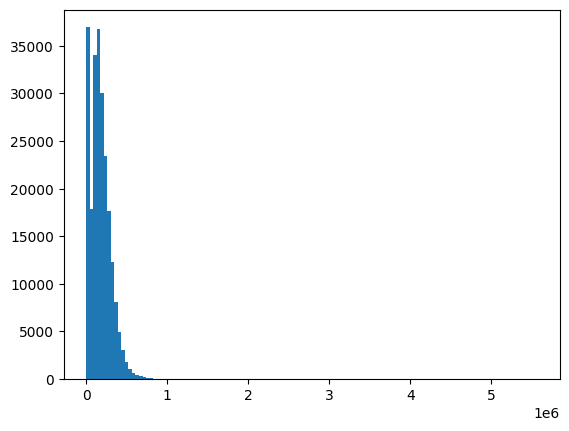

In [155]:
plt.hist(proper_d1_list,  bins=128)

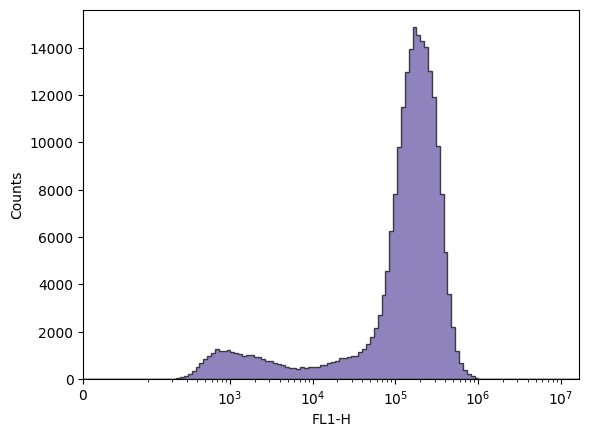

In [156]:
FlowCal.plot.hist1d(d1, channel='FL1-H', alpha=0.7, bins=128)

In [162]:
d3 = FlowCal.io.FCSData('02-blank-C4-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()
print(d3_list[0][0])

proper_d3_list = []
for i in range(len(d3_list)):
    proper_d3_list.append(d3_list[i][0])

print(proper_d3_list[:100])
print(type(proper_d3_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d3_list))



d4 = FlowCal.io.FCSData('02-blank-C4-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()
print(d4_list[0][0])

proper_d4_list = []
for i in range(len(d4_list)):
    proper_d4_list.append(d4_list[i][0])

print(proper_d4_list[:100])
print(type(proper_d4_list[:100]))

print(stats.ks_2samp(proper_d1_list, proper_d4_list))

print(stats.ks_2samp(proper_d2_list, proper_d3_list))
print(stats.ks_2samp(proper_d2_list, proper_d4_list))
print(stats.ks_2samp(proper_d3_list, proper_d4_list))


56588.30078125
[56588.30078125, 181867.203125, 34720.19921875, 3074.800048828125, 7340.2998046875, 65783.3984375, 137855.0, 926.4000244140625, 354762.59375, 90182.0, 86396.1015625, 180506.203125, 373523.3125, 121650.0, 39579.30078125, 509.70001220703125, 3668.60009765625, 285736.3125, 309787.59375, 287974.3125, 3802.300048828125, 279875.3125, 3244.300048828125, 77994.703125, 53884.3984375, 84001.796875, 4044.39990234375, 305009.1875, 113849.0, 437649.90625, 341534.8125, 292744.1875, 45190.69921875, 245026.0, 428176.40625, 5159.89990234375, 364772.59375, 47516.8984375, 143590.0, 100152.5, 457964.09375, 213984.59375, 220305.40625, 58585.19921875, 24866.5, 128195.3984375, 231788.90625, 211851.09375, 18280.900390625, 219729.40625, 935.7000122070312, 453724.3125, 8002.7998046875, 2155.0, 146223.40625, 11735.0, 146638.40625, 487130.59375, 256604.09375, 114954.203125, 135586.0, 249451.296875, 407189.6875, 358524.59375, 245176.296875, 85521.1015625, 224469.5, 161124.90625, 44675.6015625, 16075

Text(0.5, 1.0, 'Cumulative Distribution Function (CDF) of FITC data')

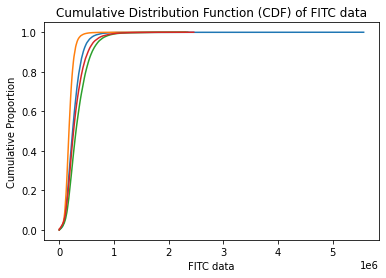

In [ ]:
D= pd.DataFrame (proper_d1_list, columns = ['Data'])
data = D["Data"]

sorted_data = np.sort(data)
cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)

import matplotlib.pyplot as plt

plt.plot(sorted_data, cumulative_data)



D2= pd.DataFrame (proper_d2_list, columns = ['Data'])
data2 = D2["Data"]

sorted_data2 = np.sort(data2)
cumulative_data2 = np.cumsum(sorted_data2) / np.sum(sorted_data2)

import matplotlib.pyplot as plt

plt.plot(sorted_data2, cumulative_data2)



D3= pd.DataFrame (proper_d3_list, columns = ['Data'])
data3 = D3["Data"]

sorted_data3 = np.sort(data3)
cumulative_data3 = np.cumsum(sorted_data3) / np.sum(sorted_data3)

import matplotlib.pyplot as plt

plt.plot(sorted_data3, cumulative_data3)




D4= pd.DataFrame (proper_d4_list, columns = ['Data'])
data4 = D4["Data"]

sorted_data4 = np.sort(data4)
cumulative_data4 = np.cumsum(sorted_data4) / np.sum(sorted_data4)

import matplotlib.pyplot as plt

plt.plot(sorted_data4, cumulative_data4)


plt.xlabel("FITC data")
plt.ylabel("Cumulative Proportion")
plt.title("Cumulative Distribution Function (CDF) of FITC data")


In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal
import scipy
from scipy.stats import ks_2samp
from scipy import stats
import scipy.integrate

n1 = sorted_data.shape[0]
n2 = sorted_data2.shape[0]
data_all = np.concatenate([sorted_data, sorted_data2])
cdf1 = np.searchsorted(sorted_data, data_all, side='right') / n1
cdf2 = np.searchsorted(sorted_data2, data_all, side='right') / n2
d = np.max(np.absolute(cdf1 - cdf2))
print(d)

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

print(ecdf(data))
print(ecdf(data2))


0.12469156044417051
(array([4.00000006e-01, 4.00000006e-01, 6.00000024e-01, ...,
       2.36814025e+06, 2.46373075e+06, 5.56569450e+06]), array([2.06277860e-06, 4.12555721e-06, 6.18833581e-06, ...,
       9.99995874e-01, 9.99997937e-01, 1.00000000e+00]))
(array([1.00000001e-01, 6.00000024e-01, 1.50000000e+00, ...,
       1.09485025e+06, 1.15416175e+06, 2.30869900e+06]), array([2.44025642e-06, 4.88051284e-06, 7.32076927e-06, ...,
       9.99995119e-01, 9.99997560e-01, 1.00000000e+00]))


In [ ]:
print(type(cdf1))
print(type(np. asarray(ecdf(data))))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
abs(np.subtract(np. asarray(ecdf(data)), np. asarray(ecdf(data2))))

ValueError: operands could not be broadcast together with shapes (2,484783) (2,409793) 

In [ ]:
from sympy import Interval, Union

Interval(np. asarray(ecdf(data2)),np. asarray(ecdf(data))).sup

SympifyError: SympifyError: array([[1.00000001e-01, 6.00000024e-01, 1.50000000e+00, ...,
        1.09485025e+06, 1.15416175e+06, 2.30869900e+06],
       [2.44025642e-06, 4.88051284e-06, 7.32076927e-06, ...,
        9.99995119e-01, 9.99997560e-01, 1.00000000e+00]])

In [ ]:
d2 = np.max(np.absolute(ecdf(data) - ecdf(data2)))


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [ ]:
import math

print(sorted_data.size)

critical_value= 1.36/math.sqrt(sorted_data.size)
print(critical_value)

d3 = np.max(np.absolute(ecdf(data) - cdf1))


484783
0.001953283211934081


ValueError: operands could not be broadcast together with shapes (2,484783) (894576,) 

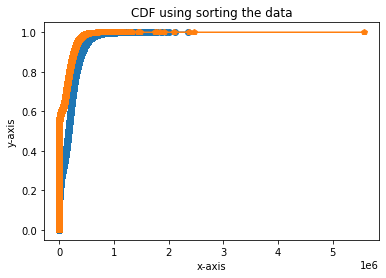

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

D3= pd.DataFrame (proper_d3_list, columns = ['Data'])
data = D3["Data"]

# No of data points used
N = len(data)

# sort the data in ascending order
x = np.sort(data)

# get the cdf values of y
y = np.arange(N) / float(N)

# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.title('CDF using sorting the data')

plt.plot(x, y, marker='o')


D= pd.DataFrame (proper_d1_list, columns = ['Data'])
data = D["Data"]

# No of data points used
N = len(data)

# sort the data in ascending order
x = np.sort(data)

# get the cdf values of y
y = np.arange(N) / float(N)

plt.plot(x, y, marker='p')


The CDF result is- [0.00000000e+00 2.06278286e-06 4.12556572e-06 ... 9.99995874e-01
 9.99997937e-01 1.00000000e+00]


Text(0, 0.5, 'p')

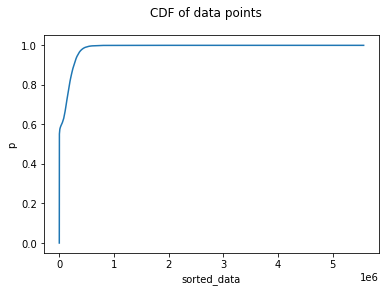

In [ ]:
D= pd.DataFrame (proper_d1_list, columns = ['Data'])
data = D["Data"]

sorted_data = np.sort(data)
p = 1. * np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
print("The CDF result is-",p)

fig = plt.figure()
fig.suptitle('CDF of data points')
ax2 = fig.add_subplot(111)
ax2.plot(sorted_data, p)
ax2.set_xlabel('sorted_data')
ax2.set_ylabel('p')
